In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fredapi as fd
import plotly.express as px

In [123]:
fred=fd.Fred(api_key='d374b0e0f753010f7f02e70aa6fd8b9f')

In [124]:
data=fred.search('Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')
data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-04-29,2024-04-29,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-04-10 07:49:03-05:00,95,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2024-04-29,2024-04-29,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2024-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-04-10 07:49:07-05:00,73,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2024-04-29,2024-04-29,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:07-06:00,46,None
CPILFESL,CPILFESL,2024-04-29,2024-04-29,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-04-10 07:49:03-05:00,82,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2024-04-29,2024-04-29,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-04-10 07:49:15-05:00,53,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2024-04-29,2024-04-29,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:13-06:00,10,None
APU0000708111,APU0000708111,2024-04-29,2024-04-29,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2024-03-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-04-10 07:36:03-05:00,76,"Large white, Grade A chicken eggs, sold in a c..."
APU0000703112,APU0000703112,2024-04-29,2024-04-29,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2024-03-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-04-10 07:36:03-05:00,68,Fresh regular 100% ground beef excluding round...
APU0000702111,APU0000702111,2024-04-29,2024-04-29,"Average Price: Bread, White, Pan (Cost per Pou...",1980-01-01,2024-03-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-04-10 07:36:04-05:00,68,All white pre-packaged regular bread regardles...


In [125]:
cpi=fred.get_series('CPIAUCSL')
cpi.name='values'
cpi

1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2023-11-01    308.024
2023-12-01    308.742
2024-01-01    309.685
2024-02-01    311.054
2024-03-01    312.230
Name: values, Length: 927, dtype: float64

In [126]:
df=pd.DataFrame(cpi).reset_index()
df

,index,values
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
922,2023-11-01,308.024
923,2023-12-01,308.742
924,2024-01-01,309.685
925,2024-02-01,311.054


In [127]:
df2=df[df['index']>'1989-12-01']
df2

,index,values
516,1990-01-01,127.500
517,1990-02-01,128.000
518,1990-03-01,128.600
519,1990-04-01,128.900
520,1990-05-01,129.100
...,...,...
922,2023-11-01,308.024
923,2023-12-01,308.742
924,2024-01-01,309.685
925,2024-02-01,311.054


In [128]:
fig=px.line(df2, x='index', y='values', title='CPI Avg. 1990-2024')
fig.show()

In [129]:
#conditions for efficient prophet model

#1. univarlate data 2. prophet is predetermined to daily data 3. date -- ds and variable--y 4. date should be in date in date time

df2=df2.rename(columns={'index':'ds', 'values':'y'})
df2

,ds,y
516,1990-01-01,127.500
517,1990-02-01,128.000
518,1990-03-01,128.600
519,1990-04-01,128.900
520,1990-05-01,129.100
...,...,...
922,2023-11-01,308.024
923,2023-12-01,308.742
924,2024-01-01,309.685
925,2024-02-01,311.054


In [130]:
from prophet import Prophet

ml = Prophet()  # Створення екземпляру моделі Prophet
ml.fit(df2)     # Передача DataFrame з даними для навчання моделі

18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing


In [131]:
future=ml.make_future_dataframe(periods=10, freq='MS') #weekly 'W

In [132]:
future.tail()

,ds
416,2024-09-01
417,2024-10-01
418,2024-11-01
419,2024-12-01
420,2025-01-01


In [133]:
result=ml.predict(future)
result[['ds', 'yhat', 'yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,129.443549,125.266865,133.528936
1,1990-02-01,129.984872,125.884253,133.962187
2,1990-03-01,130.215661,126.011692,134.160322
3,1990-04-01,130.564033,126.330027,134.571253
4,1990-05-01,130.923132,126.791791,135.000690
...,...,...,...,...
416,2024-09-01,310.173299,306.095726,314.346634
417,2024-10-01,310.925705,306.731048,315.211899
418,2024-11-01,311.317590,307.128267,315.312465
419,2024-12-01,311.925805,308.018663,315.723904


C:\Users\Karina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Karina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



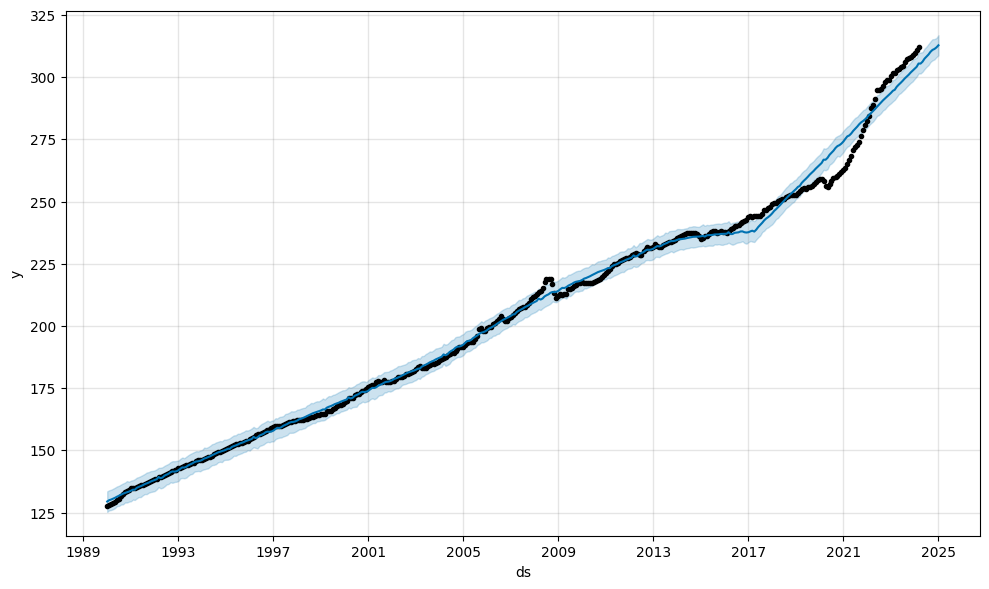

In [134]:
fig=ml.plot(result)

C:\Users\Karina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Karina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Karina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of

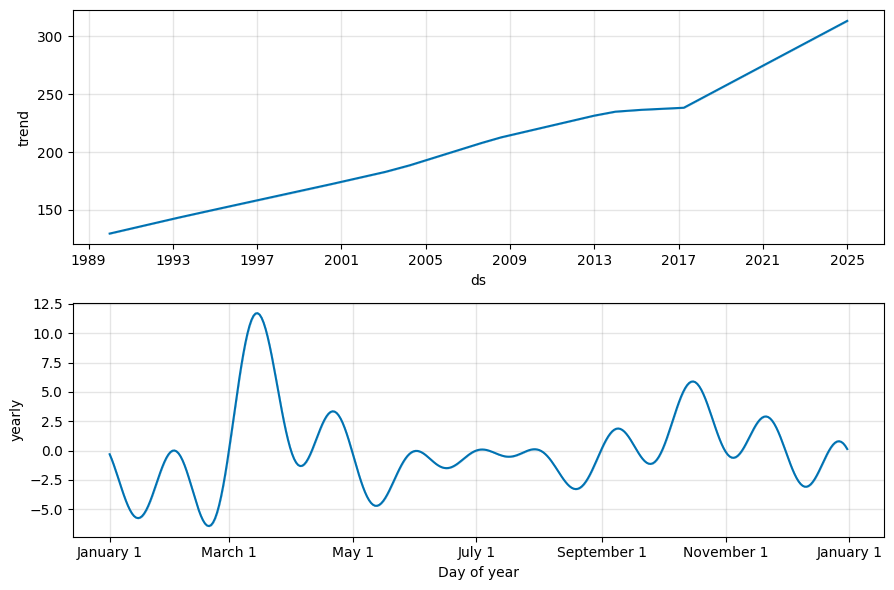

In [135]:
fig2=ml.plot_components(result)

In [136]:
from prophet.diagnostics import cross_validation,performance_metrics


cv_result=cross_validation(model=ml, initial=pd.to_timedelta(30*20, unit='D'), period=pd.to_timedelta(30*5, unit='D'), horizon=pd.to_timedelta(30*12, unit='D'))

df_p=performance_metrics(cv_result)


  0%|          | 0/77 [00:00<?, ?it/s]18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
  1%|▏         | 1/77 [00:11<14:59, 11.83s/it]18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 2/77 [00:25<15:53, 12.71s/it]18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 3/77 [00:39<16:45, 13.59s/it]18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 4/77 [00:40<10:09,  8.36s/it]18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
  6%|▋         | 5/77 [00:40<06:31,  5.44s/it]18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 6/77 [00:40<04:23,  3.71s/it]18:06:49

In [137]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,14.465591,3.803366,2.102416,0.008843,0.006190,0.008903,0.197802
1,38 days,14.635496,3.825637,2.135346,0.008996,0.006190,0.009058,0.208791
2,39 days,14.700105,3.834072,2.152919,0.009080,0.006216,0.009142,0.197802
3,40 days,14.687337,3.832406,2.152006,0.009081,0.006216,0.009143,0.192308
4,41 days,15.175817,3.895615,2.216577,0.009369,0.006216,0.009425,0.197802
...,...,...,...,...,...,...,...,...
319,356 days,53.005380,7.280479,4.261108,0.017409,0.011717,0.017665,0.380952
320,357 days,48.521543,6.965741,4.118249,0.016981,0.012837,0.017214,0.373626
321,358 days,51.842603,7.200181,4.283647,0.017500,0.013410,0.017753,0.373626
322,359 days,45.876177,6.773196,4.097261,0.016981,0.013506,0.017201,0.362637


C:\Users\Karina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



C:\Users\Karina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



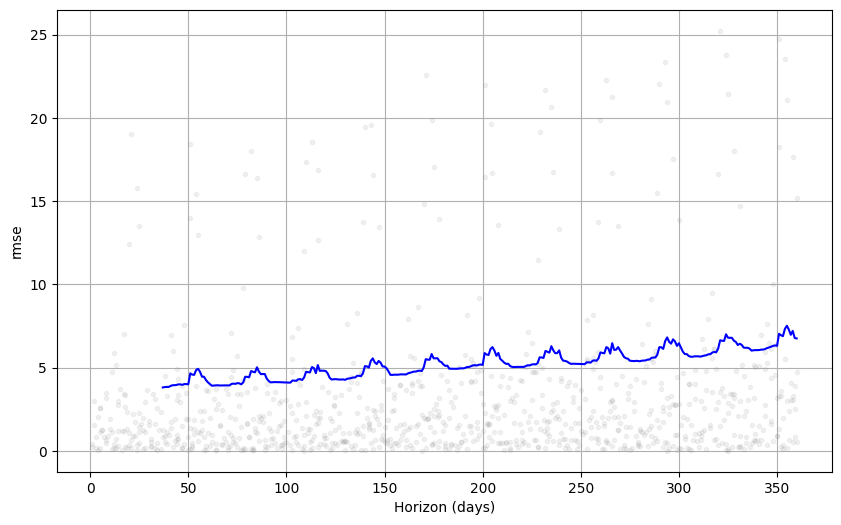

In [138]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(cv_result,metric='rmse')